### **Disclaimer:** If you spot something I’ve missed or interpreted differently, feel free to share. I’m always up for constructive feedback!

# -**Import Libraries & Load Dataset**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = '/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv'
df = pd.read_csv(file_path)

# Print basic info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (2226382, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


# -**Basic Data Understanding & Cleaning**

In [2]:
# Check data types and nulls
print(df.info())

# Summary statistics
print(df.describe())

# Check missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing Values:\n", missing)

# Check unique states
print("Unique States:", df['state'].nunique())
print("States List:\n", df['state'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB
None
        brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.6500

# -**Data Cleaning**

In [3]:
# Convert zip_code and street to string (categorical)
df['zip_code'] = df['zip_code'].astype(str)
df['street'] = df['street'].astype(str)

# Convert date field (if needed)
# df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

# Drop rows with missing critical data or invalid zero values
df = df.dropna(subset=['price', 'bed', 'bath', 'state'])
df = df[(df['price'] > 0) & (df['bed'] > 0) & (df['bath'] > 0)]

# Drop irrelevant or too-missing columns (optional)
df.drop(columns=['brokered_by', 'prev_sold_date'], inplace=True)

# Convert house_size, acre_lot to numeric (again for safety)
df['house_size'] = pd.to_numeric(df['house_size'], errors='coerce')
df['acre_lot'] = pd.to_numeric(df['acre_lot'], errors='coerce')

# Final check
print("New shape after cleaning:", df.shape)
print(df.isnull().sum())


New shape after cleaning: (1704378, 10)
status             0
price              0
bed                0
bath               0
acre_lot      272265
street             0
city             392
state              0
zip_code           0
house_size     98876
dtype: int64


In [4]:
# Drop missing city rows
df = df[df['city'].notnull()]

# Fill acre_lot missing with median
df['acre_lot'].fillna(df['acre_lot'].median(), inplace=True)

# Fill house_size missing with median
df['house_size'].fillna(df['house_size'].median(), inplace=True)


# -**(EDA) Exploratory Data Analysis & Visualization**

# **1. Average Property Price by State**

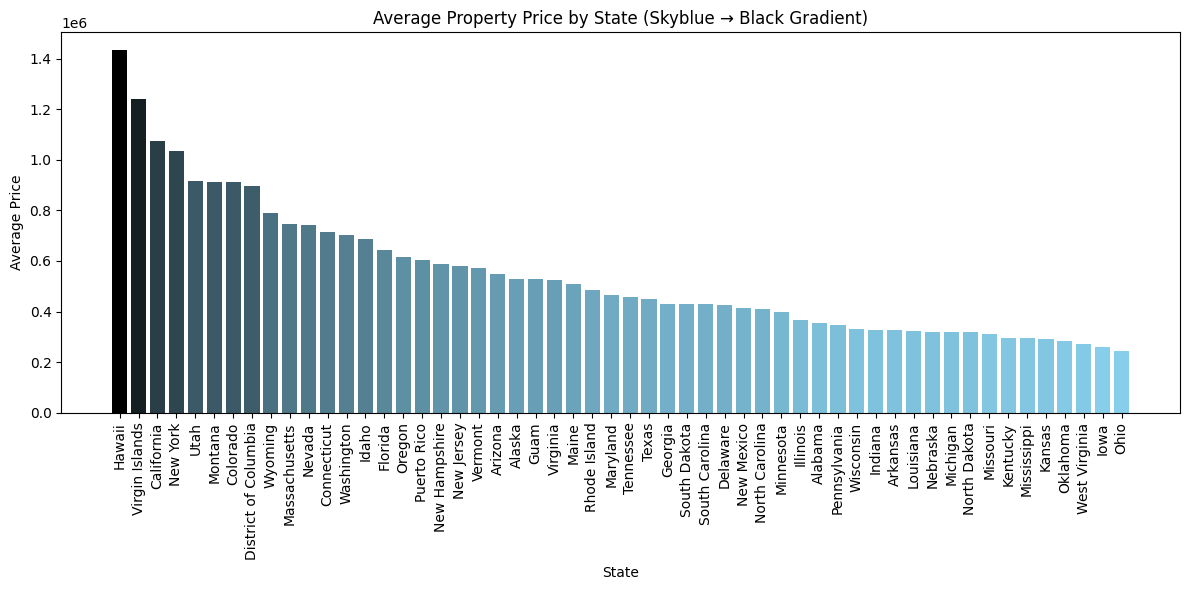

In [5]:
from matplotlib.colors import LinearSegmentedColormap

# Step 1: Calculate average price per state
avg_price_state = df.groupby('state')['price'].mean().sort_values(ascending=False)

# Step 2: Create a custom colormap from skyblue to black
colorscale = LinearSegmentedColormap.from_list("skyblue_black", ["skyblue", "black"], N=len(avg_price_state))

# Step 3: Normalize the data to assign gradient colors
normalized = (avg_price_state - avg_price_state.min()) / (avg_price_state.max() - avg_price_state.min())
bar_colors = [colorscale(val) for val in normalized]

# Step 4: Plot with custom colors
plt.figure(figsize=(12,6))
plt.bar(avg_price_state.index, avg_price_state.values, color=bar_colors)
plt.title('Average Property Price by State (Skyblue → Black Gradient)')
plt.ylabel('Average Price')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Average Property Price by State

**What do we see?**  
This bar chart shows the average home prices across different states in the USA. States like Hawaii, California and New York have significantly higher average prices than others.

**Why does it matter?**  
This helps identify which states are more expensive for real estate investment or home buying.

**What can we do?**  
Buyers or investors can prioritize or avoid certain states based on their budget. Real estate companies can also focus marketing efforts accordingly.


**Insight:** States like Hawaii, California and New York have significantly higher average property prices compared to others. This indicates that location is a major factor influencing property prices.

**Useful:** To understand Location-based Investment Strategy.

# **2. Top 10 Cities with Highest Median Price**

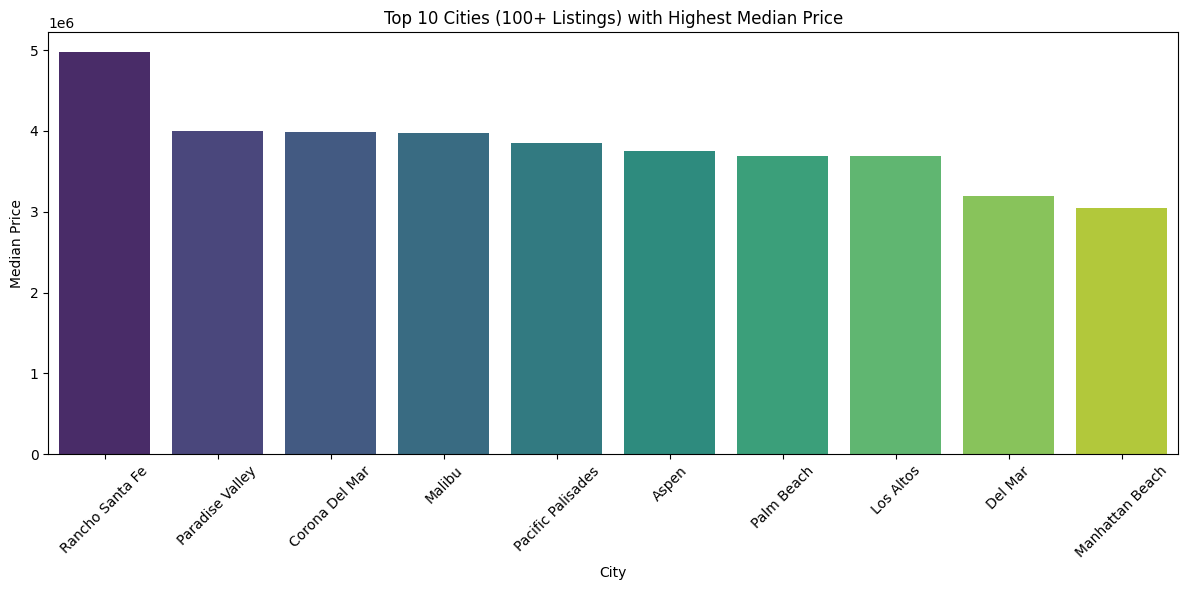

city
Rancho Santa Fe      4972500.0
Paradise Valley      3996550.0
Corona Del Mar       3990000.0
Malibu               3975000.0
Pacific Palisades    3850000.0
Aspen                3747500.0
Palm Beach           3695000.0
Los Altos            3685000.0
Del Mar              3200100.0
Manhattan Beach      3049999.5
Name: price, dtype: float64


In [6]:
# Step 1: Filter only cities with more than 100 listings
city_counts = df['city'].value_counts()
valid_cities = city_counts[city_counts > 100].index
df_valid = df[df['city'].isin(valid_cities)]

# Step 2: Now calculate top 10 cities with highest median price (from valid ones)
top_cities_cleaned = df_valid.groupby('city')['price'].median().sort_values(ascending=False).head(10)

# Step 3: Plot again
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities_cleaned.index, y=top_cities_cleaned.values, palette='viridis')
plt.title('Top 10 Cities (100+ Listings) with Highest Median Price')
plt.ylabel('Median Price')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, show the city names and prices
print(top_cities_cleaned)


### Top 10 Cities with Highest Median Price

**What do we see?**  
Cities like Rancho Santa Fe, Paradise Valley, and Malibu have the highest median property prices, often exceeding $3 million.

**Why does it matter?**  
It highlights the luxury housing markets in the USA, where demand and exclusivity drive up prices.

**What can we do?**  
Real estate agents targeting high-net-worth individuals can focus on these cities. Buyers can also benchmark these areas as ultra-premium zones.


**Insight:** Cities such as Rancho Santa Fe, Paradise Valley,Corona Del Mar and Malibu have the highest median property prices, highlighting them as luxury real estate markets.

**Useful for:** High-end market segmentation.

# **3. Distribution of House Sizes**

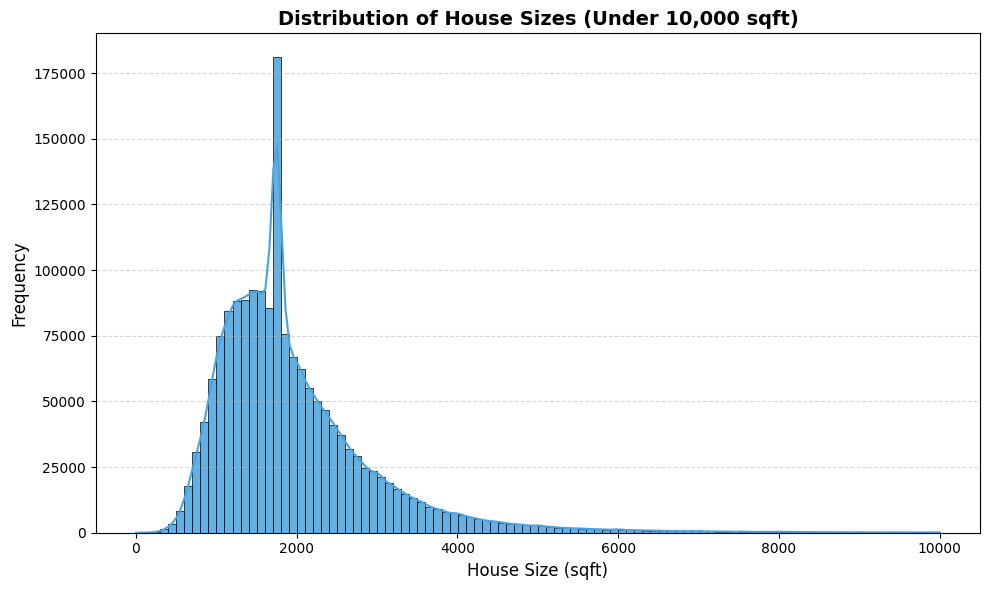

In [7]:
# Only work with houses under 10,000 sqft
filtered = df[df['house_size'] <= 10000]

plt.figure(figsize=(10,6))
sns.histplot(
    filtered['house_size'],
    bins=100,
    kde=True,
    color='#4aa3df',  # Attractive Sky Blue (slightly deeper)
    edgecolor='black',
    alpha=0.85
)
plt.title('Distribution of House Sizes (Under 10,000 sqft)', fontsize=14, fontweight='bold')
plt.xlabel('House Size (sqft)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


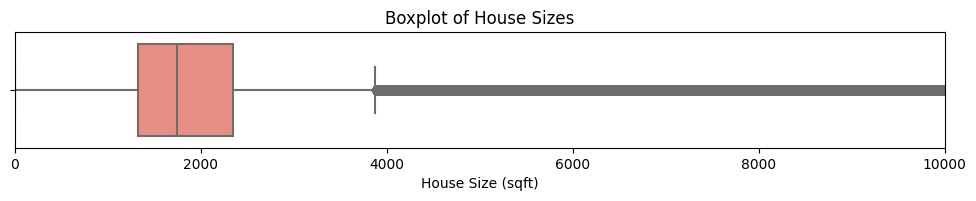

In [8]:
plt.figure(figsize=(12, 1.5))
sns.boxplot(x=df['house_size'], color='salmon')
plt.title('Boxplot of House Sizes')
plt.xlabel('House Size (sqft)')
plt.xlim(0, 10000)  
plt.show()


### Distribution of House Sizes

**What do we see?**  
Most houses fall between 1,000 to 3,000 square feet in size. There are a few very large properties, but they are rare.

**Why does it matter?**  
This shows the typical size of houses being listed and helps understand market trends.

**What can we do?**  
Developers and investors can tailor their projects to align with the most in-demand size ranges.


**Insight:** The majority of houses fall within the 1,000–3,000 sqft range, indicating a preference for mid-sized homes. There are also outliers with significantly larger sizes, representing luxury properties.

**Useful for:** Typical buyer preference or construction planning.

# **4. Price vs. Number of Beds**

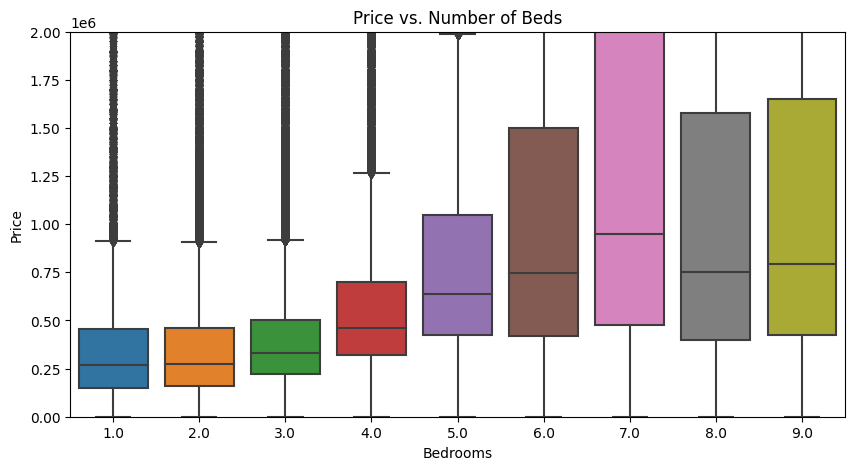

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['bed'] < 10], x='bed', y='price')
plt.ylim(0, 2_000_000)
plt.title('Price vs. Number of Beds')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


### Price vs. Number of Bedrooms

**What do we see?**  
Homes with more bedrooms generally have higher prices, though the increase isn't always linear.

**Why does it matter?**  
This reveals how the number of bedrooms affects pricing — important for property valuation and planning.

**What can we do?**  
Sellers can better price their homes. Buyers can assess how many beds offer the best value within their budget.


**Insight:** Generally, as the number of bedrooms increases, the property price also increases. However, beyond a certain point, the price increment per additional bedroom diminishes, suggesting diminishing returns.

**Useful for:** Predictive modeling and buyer preference analysis.

# **5. Price vs. Number of Baths**

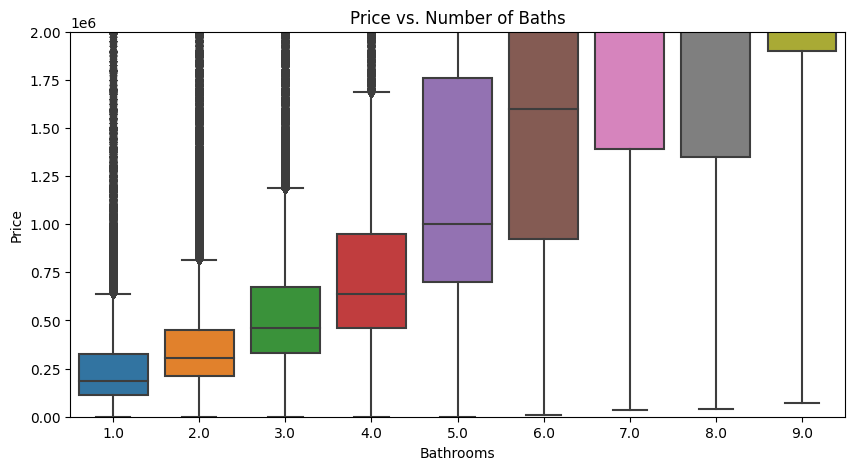

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['bath'] < 10], x='bath', y='price')
plt.ylim(0, 2_000_000)
plt.title('Price vs. Number of Baths')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()


### Price vs. Number of Bathrooms

**What do we see?**  
Properties with more bathrooms tend to be more expensive, but there's also a lot of variation.

**Why does it matter?**  
This shows how an additional bathroom can influence pricing — relevant for renovations or home upgrades.

**What can we do?**  
Homeowners planning to renovate may consider adding a bathroom to increase value.


**Insight:** Similar to bedrooms, more bathrooms typically correlate with higher property prices, but the relationship is not strictly linear, indicating other factors also play a role.

**Useful:** To understand how many facilities will be increased if the budget is increased.

# **6. Price vs. Acre Lot Size**

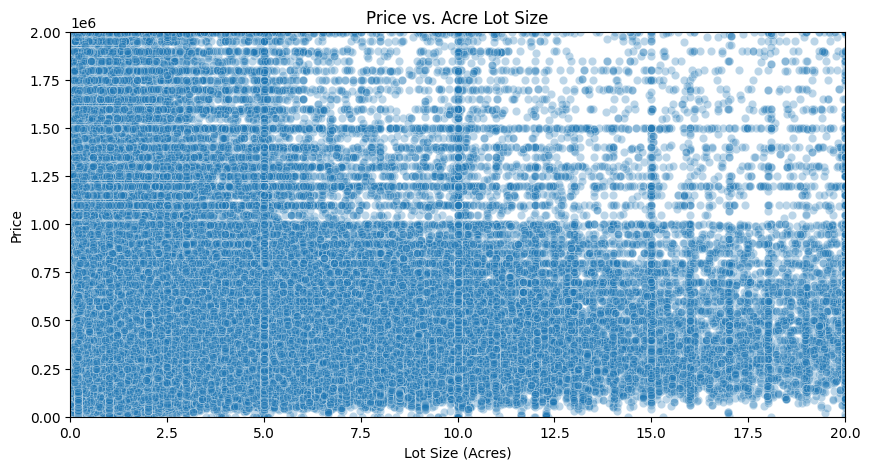

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='acre_lot', y='price', data=df, alpha=0.3)
plt.xlim(0, 20)
plt.ylim(0, 2_000_000)
plt.title('Price vs. Acre Lot Size')
plt.xlabel('Lot Size (Acres)')
plt.ylabel('Price')
plt.show()


### Price vs. Acre Lot Size

**What do we see?**  
There's a positive correlation — larger lot sizes usually result in higher property prices.

**Why does it matter?**  
Land area is a key factor in real estate pricing, especially for investors and developers.

**What can we do?**  
Investors can focus on large-lot properties in expanding suburban or rural areas.


**Insight:** Larger lot sizes tend to have higher property prices, but there is considerable variance, suggesting that factors like location and land usability also influence pricing.

**Useful:** Investment in land vs structure comparison.

# **7. Correlation Heatmap of Numerical Columns**

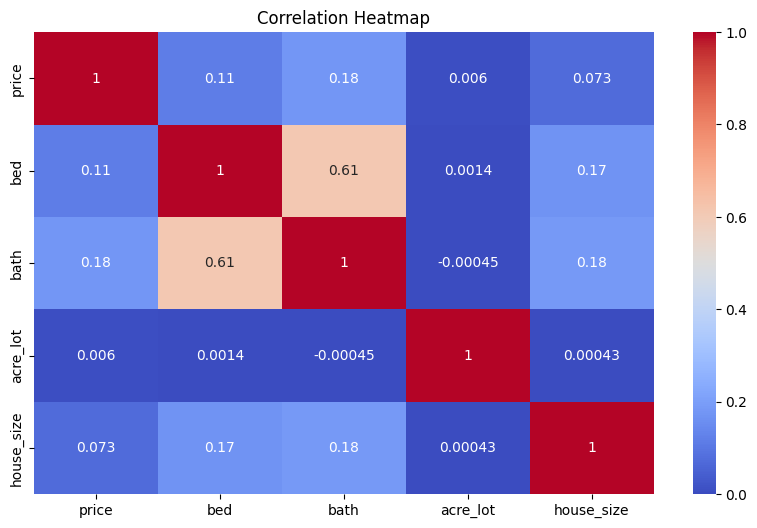

In [12]:
plt.figure(figsize=(10,6))
num_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Correlation Heatmap

**What do we see?**  
Price has moderate correlations with features like house size and number of bathrooms. Other features may have low or no correlation.

**Why does it matter?**  
This helps identify which variables most strongly impact home prices — useful for building models or strategies.

**What can we do?**  
Analysts can focus on the most impactful variables when predicting prices or building valuation models.


**Insight:** House size and number of bedrooms show strong positive correlations with property price, while other factors like zip code have minimal correlation.

**Useful for:** Feature Selection and building Machine Learning models.

# **8. Most Common Zip Codes by Listings**

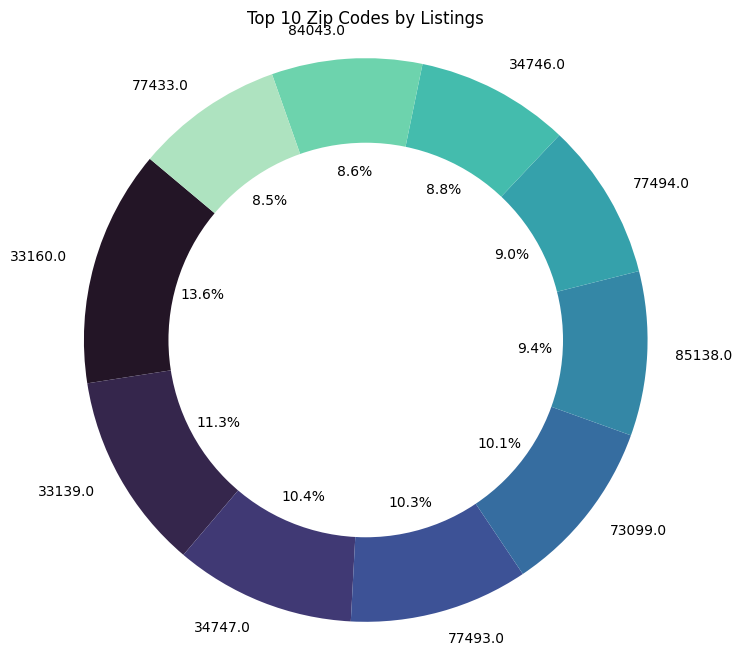

In [13]:
top_zip = df['zip_code'].value_counts().head(10)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(top_zip.values, labels=top_zip.index.astype(str), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('mako', 10))
# Draw center circle to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 10 Zip Codes by Listings')
plt.axis('equal')
plt.show()


### Most Common Zip Codes by Listings

**What do we see?**  
Some zip codes appear far more frequently than others in the dataset, indicating high activity or dense listing areas.

**Why does it matter?**  
Frequent listings in certain zip codes may indicate high turnover, hot markets, or over-supply.

**What can we do?**  
Real estate companies can prioritize marketing or outreach in high-listing zip codes.


**Insight:** Certain zip codes have a higher concentration of listings, indicating high market activity in those areas, which could be due to factors like urbanization or economic opportunities.

**Useful for:** Marketing focus area & agency targeting.

# **9. State-wise Price Range Categories**

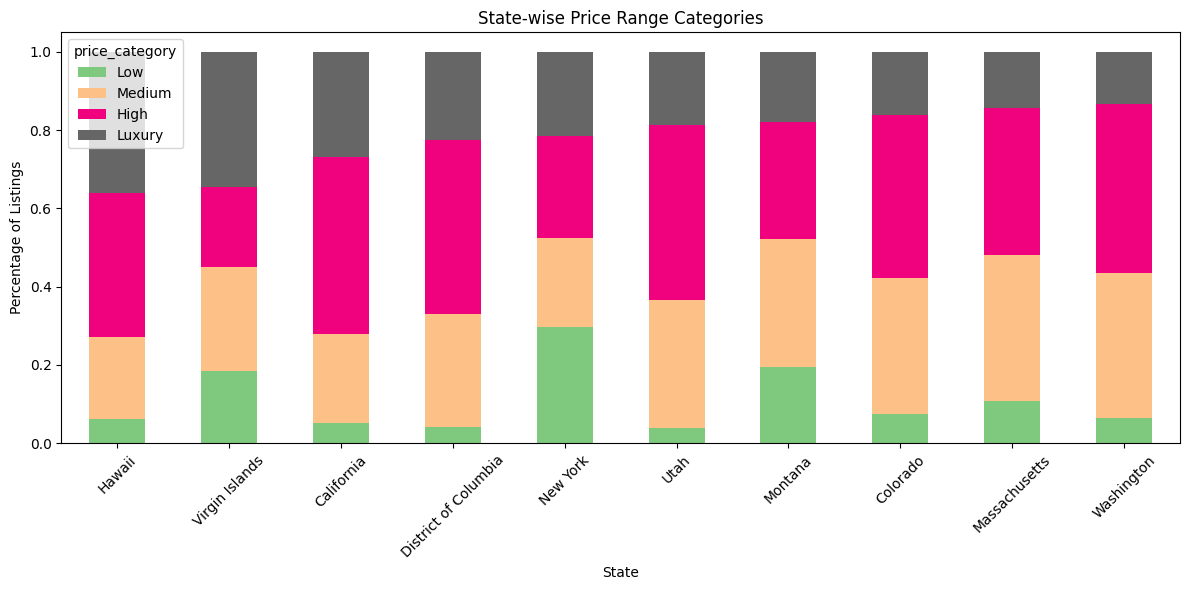

In [14]:
# Create price bins
df['price_category'] = pd.cut(df['price'], bins=[0, 250000, 500000, 1000000, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Luxury'])

state_price_cat = df.groupby(['state', 'price_category']).size().unstack().fillna(0)

# Plot stacked bar chart
state_price_cat_pct = state_price_cat.div(state_price_cat.sum(axis=1), axis=0)

state_price_cat_pct.sort_values(by='Luxury', ascending=False).head(10).plot(
    kind='bar', stacked=True, figsize=(12,6), colormap='Accent')

plt.title('State-wise Price Range Categories')
plt.ylabel('Percentage of Listings')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### State-wise Price Range Categories

**What do we see?**  
States are categorized into different price ranges (e.g., low, medium, high) based on their average prices.

**Why does it matter?**  
This offers a quick comparison across states and makes it easier to understand pricing tiers.

**What can we do?**  
Buyers and investors can target states that match their financial goals. Marketers can use this to tailor campaigns.


**Insight:** States can be categorized into different price ranges, with some states consistently offering more affordable housing options, while others are predominantly high-priced markets.

**Useful for:** Creating an affordability map or buyer targeting strategy.

# **10. Boxplot: Price Distribution by State (Top 10 States)**

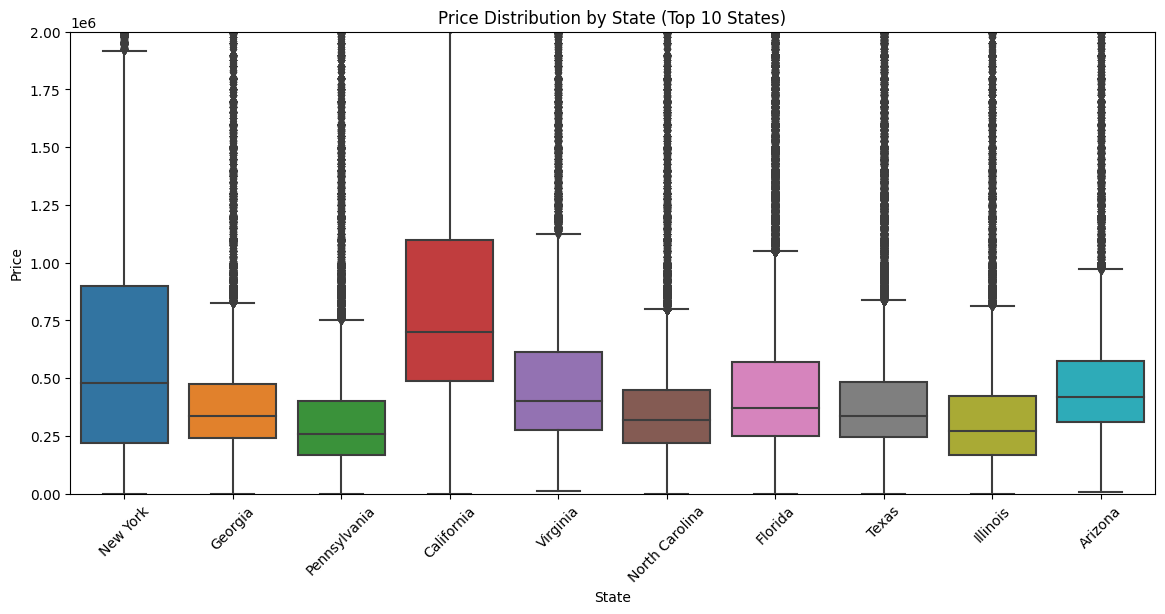

In [15]:
top_states = df['state'].value_counts().head(10).index
df_top_states = df[df['state'].isin(top_states)]

plt.figure(figsize=(14,6))
sns.boxplot(x='state', y='price', data=df_top_states)
plt.ylim(0, 2_000_000)
plt.title('Price Distribution by State (Top 10 States)')
plt.ylabel('Price')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()


### Boxplot: Price Distribution by State

**What do we see?**  
Boxplots reveal how home prices vary within each state — showing outliers, medians, and overall spread.

**Why does it matter?**  
This helps compare price distributions and spot which states have higher price variability or consistency.

**What can we do?**  
States with tight distributions may offer more predictable investment returns. Those with wide ranges may need further segmentation.


**Insight:** Price distributions vary significantly across states. Some states have a wide range of property prices, indicating diverse markets, while others have more uniform pricing.

**Useful for:** Understanding risk analysis or buyer confidence.

# -**Feature Engineering**

# **11. Price per Square Foot**

In [16]:
# Avoid division by zero
df['price_per_sqft'] = df['price'] / df['house_size']


# **12. Is_Luxury_Home**

In [17]:
df['is_luxury_home'] = df['price'].apply(lambda x: 1 if x > 1_000_000 else 0)


# **13. Bedrooms to Bathrooms Ratio**

In [18]:
# Avoid division by zero
df['bed_bath_ratio'] = df['bed'] / (df['bath'] + 1e-6)


# **14. Acre per Bedroom**

In [19]:
# Avoid division by zero
df['acre_per_bedroom'] = df['acre_lot'] / (df['bed'] + 1e-6)


# The columns created

In [20]:
df[['price', 'house_size', 'price_per_sqft', 'is_luxury_home', 'bed_bath_ratio', 'acre_per_bedroom']].head()


,price,house_size,price_per_sqft,is_luxury_home,bed_bath_ratio,acre_per_bedroom
0,105000.0,920.0,114.130435,0,1.499999,0.040000
1,80000.0,1527.0,52.390308,0,1.999999,0.020000
2,67000.0,748.0,89.572193,0,1.999998,0.075000
3,145000.0,1800.0,80.555556,0,1.999999,0.025000
4,65000.0,1748.0,37.185355,0,2.999999,0.008333


# **Luxury vs Non-luxury Homes Count:**

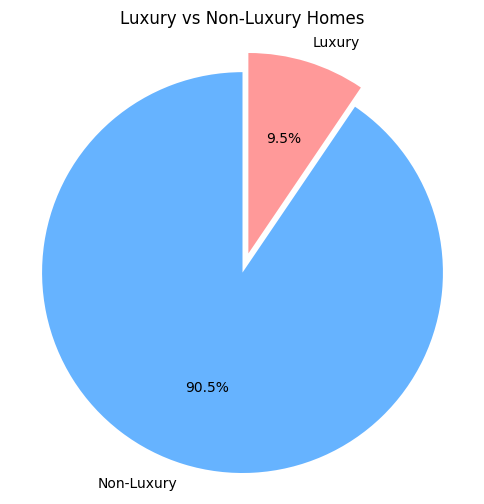

In [21]:
# Count the values
luxury_counts = df['is_luxury_home'].value_counts()

# Labels
labels = ['Non-Luxury', 'Luxury']

# Colors (optional)
colors = ['#66b3ff','#ff9999']

# Plot
plt.figure(figsize=(6,6))
plt.pie(luxury_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Luxury vs Non-Luxury Homes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Luxury vs Non-Luxury Homes (Pie Chart)

**What we see:**
This pie chart shows that only 9.5% of the homes in the dataset are classified as Luxury (priced over $1,000,000), while a large majority — 95.5% — are Non-Luxury homes.

**Why it matters:**
This distribution indicates that the real estate market represented by this dataset is mostly composed of affordable or mid-range homes. Luxury listings make up a small niche segment.

**What decision can be made:**

- For real estate professionals, focusing on affordability, location-based pricing, and first-time home buyers could yield better results.

- Luxury properties, though fewer, might require premium marketing and personalized sales strategies.

- Investors might consider targeting high-volume non-luxury areas for quicker turnover and broader customer base.

# **Price per Sqft Distribution:**

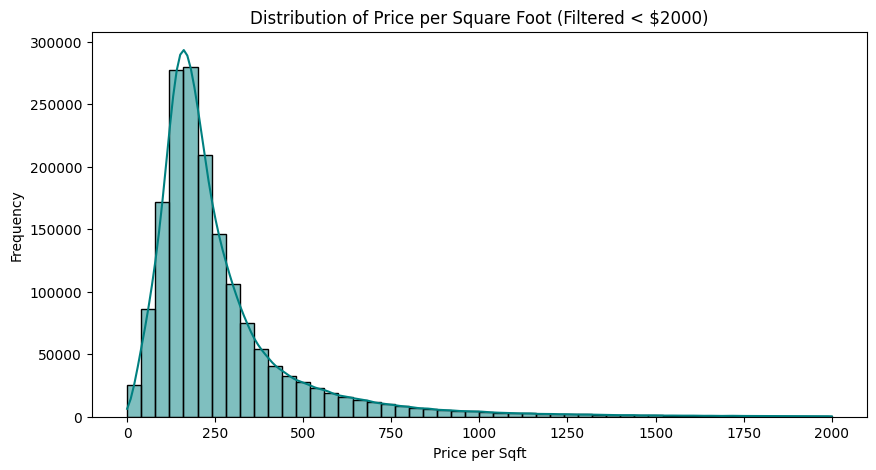

In [22]:
# Filter out extreme outliers (e.g., > $2000 per sqft)
filtered_df = df[df['price_per_sqft'] < 2000]

plt.figure(figsize=(10,5))
sns.histplot(filtered_df['price_per_sqft'], bins=50, kde=True, color='teal')
plt.title("Distribution of Price per Square Foot (Filtered < $2000)")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()


### Distribution of Price per Square Foot (Filtered < $2000)

#### What we see:
This histogram shows the distribution of home prices per square foot **after filtering out extreme outliers** (those priced above $2000 per sqft). The majority of homes fall between $100 and $400 per sqft, with a clear peak in this range. The data is now much more interpretable without the distortion from luxury outliers.

#### Why it matters:
Raw real estate price data often includes extreme values that skew the distribution and make it hard to see general trends. By removing listings priced above $2000 per sqft, we reveal a **more accurate and usable picture of the typical market behavior**, which is crucial for both analysis and decision-making.

#### What decision can be made:
This cleaned view allows analysts, investors, and homebuyers to:
- **Set realistic pricing benchmarks** for buying or selling homes.
- **Identify affordable vs premium zones** in the market.
- **Target marketing and investment strategies** around the most common price ranges.


# **15. Average Price per Sqft by Top 10 Cities**

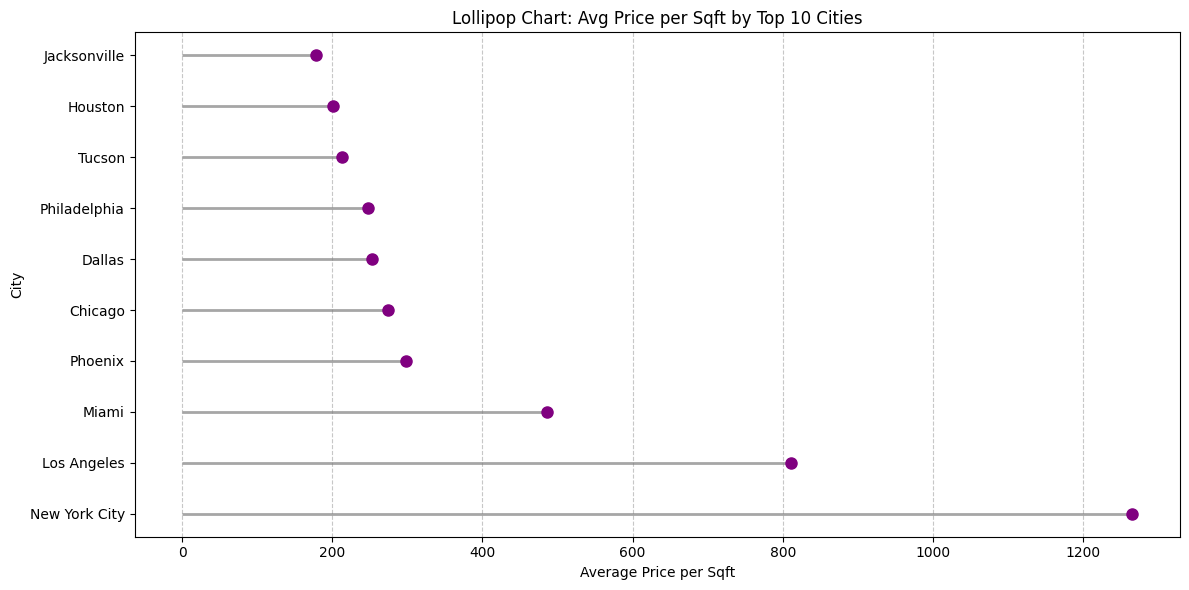

In [23]:
# Top 10 cities with most listings
top_cities = df['city'].value_counts().head(10).index

# Filter and group
avg_price_by_city = df[df['city'].isin(top_cities)].groupby('city')['price_per_sqft'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
cities = avg_price_by_city.index
prices = avg_price_by_city.values

# Draw the stems
plt.hlines(y=cities, xmin=0, xmax=prices, color='gray', alpha=0.7, linewidth=2)
# Draw the dots
plt.plot(prices, cities, "o", markersize=8, color='purple')

plt.title('Lollipop Chart: Avg Price per Sqft by Top 10 Cities')
plt.xlabel('Average Price per Sqft')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Lollipop Chart: Average Price per Square Foot by Top 10 Cities

This lollipop chart represents the **average price per square foot** for properties in the **top 10 cities** with the most listings in the dataset.


#### What we see:
- Cities like **Miami**, **Los Angeles**, and **New York** show significantly **higher average prices per square foot** compared to others.
- The **horizontal layout** makes it easy to read city names and compare values side by side.
- There's a noticeable **price gap** between the top few cities and the rest, indicating possible market concentration in high-demand areas.


#### Why it matters:
- Understanding price-per-square-foot helps assess **real estate affordability** and **property value efficiency**.
- It gives **investors** and **homebuyers** better insights into how much value they’re getting for their money in different cities.
- This is especially useful for **location-based analysis** when choosing where to buy, rent, or invest.


#### What decision can be made:
- **Buyers** can use this insight to **avoid overpriced cities** or justify paying more in high-value areas.
- **Real estate companies** and **investors** can focus their attention on cities with **high price efficiency** or potential for value growth.
- You may also consider doing further analysis comparing these cities with **median income levels** to assess affordability more deeply.

---

## Final Thoughts & What's Next?

This real estate data analysis uncovered powerful trends in the U.S. housing market — from price patterns by state and city, to key features like bathrooms and house size influencing home values. With 15+ visualizations and several engineered features, we built a strong foundation for understanding housing market dynamics.

### Key Takeaways:
-  **Location** is king — states like California dominate luxury housing.
-  **Bathrooms** affect price more than bedrooms.
-  **Price per Sqft** helps identify value beyond total price.
-  Only **9.5%** of homes in this dataset are luxury listings.
-  Feature engineering unlocked deeper insight into land usage and affordability.

---

## What's Next?

Here are some ideas to extend this project further:

- Build a **Machine Learning model** to predict house prices using the engineered features.
- Integrate **geospatial visualizations** (e.g., Folium, Mapbox) for location-specific storytelling.
- Explore external datasets like **demographics, income levels**, or **school quality** to enrich the analysis.

---

## Let's Collaborate or Discuss!

> Have questions, suggestions, or a different perspective?  
> Feel free to share your thoughts — I’m always open to learning and improving together!


